In [2]:
print("Lab 2: Data Analysis & Data Visualization")

Lab 2: Data Analysis & Data Visualization


-------------------- Data Analysis -------------------------

Importing pandas and creating dataset:

In [3]:
import pandas as pd

#read data
data = pd.read_csv("IMDB-data.csv")

#reading data with specific index
data_ind = pd.read_csv("IMDB-data.csv", index_col="Title")

ModuleNotFoundError: No module named 'pandas'

<i>Preview data</i>
Showing selected data

In [ ]:
#preview data
print(data.head())  #top 5 movies
print(data.tail())  #last 5 movies

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

In [ ]:
#Extracting data as dataframe:
data[["Genre"]]

#Slicing data
data_ind.loc[["Suicide Squad"]]
[["Genre", "Actors", "Directors", "Rating", "Revenue(Millions)"]]

[['Genre', 'Actors', 'Directors', 'Rating', 'Revenue(Millions)']]

<b>Data selection- Conditional filtering</b>
Pandas also enable retrieving data from dataframe based on conditional filters

In [ ]:
#Movie filtered based on higher revenue and lower rating
data[((data["Year"] >= 2010) & (data["Year"] <= 2016)) & (data["Rating"] < 6.0) & (data["Revenue (Millions)"] > data["Revenue (Millions)"].quantile(.95))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
941,942,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",As a string of mysterious killings grips Seatt...,David Slade,"Kristen Stewart, Robert Pattinson, Taylor Laut...",2010,124,4.9,192740,300.52,58.0


<i>Groupby Operation</i>
Data can be grouped and operations can be performed on grouped data.

In [ ]:
data.groupby("Director")[["Rating"]].mean().head()

,Rating
Director,
Aamir Khan,8.5
Abdellatif Kechiche,7.8
Adam Leon,6.5
Adam McKay,7.0
Adam Shankman,6.3


<i>Sorting Operation</i>
A method is used to perform sorting operation on a column or a list of multiple columns

In [ ]:
data.groupby("Director")[["Rating"]].mean().sort_values(["Rating"], ascending = False). head()

,Rating
Director,
Nitesh Tiwari,8.80
Christopher Nolan,8.68
Olivier Nakache,8.60
Makoto Shinkai,8.60
Aamir Khan,8.50


<i>Dealing with missing values</i>
Pandas has method to detect null values in a dataframe.

In [ ]:
#to check null values row-wise
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<i>Dropping columns and null values</i>
Specific row or column can be dropped

In [ ]:
data.drop("Metascore", axis=1).head()

#dropping data with null values
data.dropna(axis=1, thresh=6) #thresh parameter is to specify the minimum number of non-null values for the column/row to be held without dropping

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


IF there are records where a column value is null, the value can be filled with other specified values

In [ ]:
#finding the mean revenue
rev_mean = data_ind["Revenue (Millions)"].mean()
print("The mean revenue is: ", rev_mean)

#filling the null values with this mwan revenue
data_ind["Revenue (Millions)"].fillna(rev_mean, inplace=True)

The mean revenue is:  82.9563761467888


<i>Apply() Function</i>
It is useful when a function is needed to be applied to the dataset. It returns a value after passing each row of the dataframe to some function

In [ ]:
#Classify movies based on ratings:

def rated_grp(rating):
    if rating >= 7.5:
        return "Good"
    elif rating >= 6.5:
        return "Average"
    else: return "Bad"

#Now to apply the function to the dataset:
data["Rate_category"] = data["Rating"].apply(rated_grp)
data[["Title", "Director", "Rating", "Rate_category"]].head(5)

,Title,Director,Rating,Rate_category
0,Guardians of the Galaxy,James Gunn,8.1,Good
1,Prometheus,Ridley Scott,7.0,Average
2,Split,M. Night Shyamalan,7.3,Average
3,Sing,Christophe Lourdelet,7.2,Average
4,Suicide Squad,David Ayer,6.2,Bad


--------------------------- Data Visualization -------------------------------

Setting up the work environment by importing seaborn and setting the format to svg.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#graphics in SVG format
%config InlineBackend.figure_format = "svg"
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["image.cmap"] = "viridis"

Now to get and fix the data set

In [ ]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

df = pd.read_csv(DATA_URL + "video_games_sales.csv").dropna()
print(df.shape)

(6825, 16)


In [ ]:
#let's print the summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [ ]:
#to change the numerical feature into float and integer from object type:
df["User_Score"] = df["User_Score"].astype("float64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

In [ ]:
#checking the columns 
useful_cols = [
"Name",
"Platform",
"Year_of_Release",
"Genre",
"Global_Sales",
"Critic_Score",
"Critic_Count",
"User_Score",
"User_Count",
"Rating",
]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


The simplest way to visualize from dataframe is using  plot() method. Let a plot be created  of video game sales by country and year.

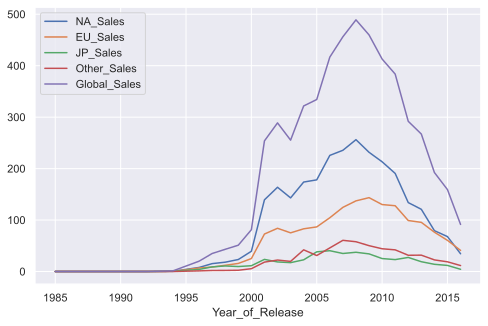

In [ ]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
"Year_of_Release"
).sum().plot();

Now we will plot the dataset in various way using seaborn

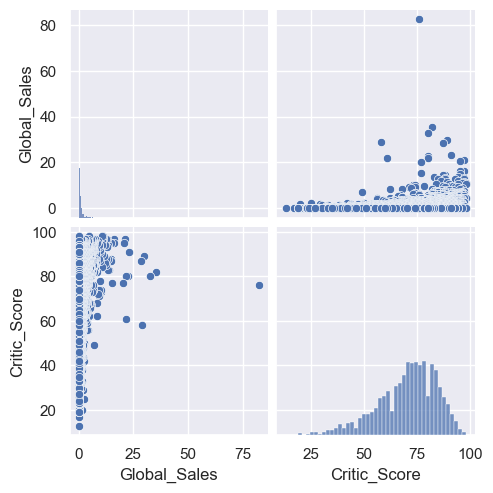

In [ ]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(
df[["Name", "Global_Sales", "Genre", "Critic_Score"]]
);

We can also see the distribution of observation.

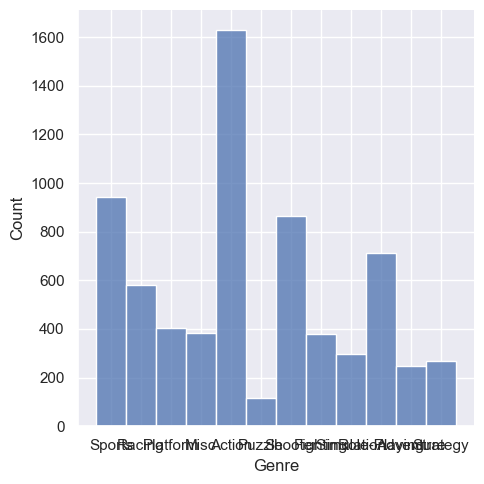

In [ ]:
sns.displot(df["Genre"])

To observe relationship between two numerial variables, joint plot is used. This creates a cross between a scatter plot and histogram.

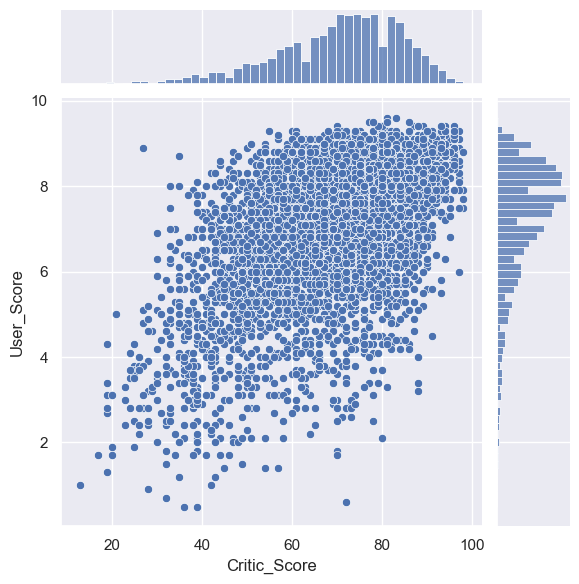

In [ ]:
sns.jointplot(x= "Critic_Score", y="User_Score", data=df, kind="scatter")

Next is boxplot which is useful to cpmpare the value of a specific variable with respect to different values of another variable. Let's compare the value of critic's rating on different platforms.

<Axes: xlabel='Critic_Score', ylabel='Platform'>

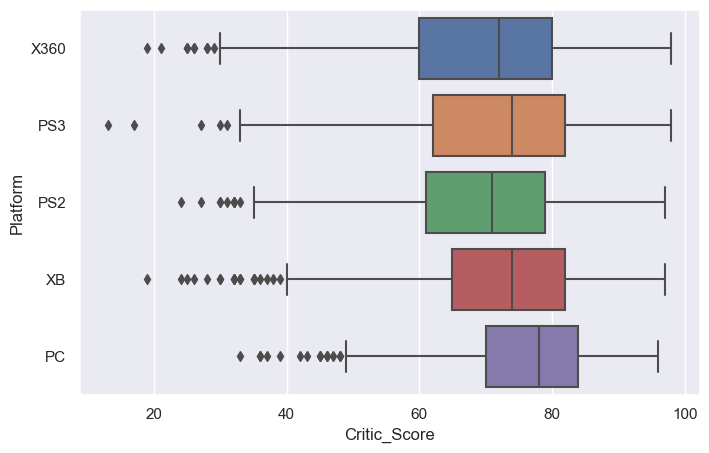

In [ ]:
top_platforms = (df["Platform"].value_counts().sort_values(ascending=False).head(5).index.values)

sns.boxplot(y="Platform",
            x="Critic_Score",
            data=df[df["Platform"].isin(top_platforms)],
            orient="h")

Finally we will see the use of heatmap which is very useful to see a overall change and comparison in a vast dataset.

<Axes: xlabel='Genre', ylabel='Platform'>

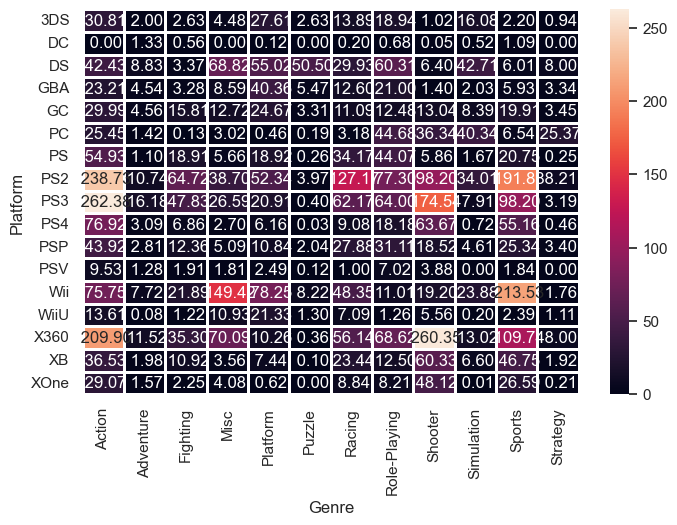

In [ ]:
platform_genre_sales = (
    df.pivot_table(
        index="Platform",
        columns= "Genre",
        values= "Global_Sales",
        aggfunc=sum
    ).fillna(0).applymap(float)
)

sns.heatmap(platform_genre_sales, annot=True, fmt = " .2f", linewidth = 0.75)

### dfk

In [5]:
print("finallyy")

finallyy
